# HOMEWORK 12

In this homework you are going to inspect the GTSDB (German Traffic Sign Detection Benchmark) dataset. The dataset contains images of various classes of traffic signs used in Germany (and the whole EU). The objective of this homework is to go through the steps described below and to implement the necessary code.

At the end, as usual, there will be a couple of questions for you to answer. In addition, the last section of this homework is optional and, if you chose to do it, you'll earn extra point :-)

In [132]:
import os
import cv2
import numpy as np
import pandas as pd
import zipfile
import io
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

### Step 0

Go to the GTSRB dataset official site ([link](https://benchmark.ini.rub.de/gtsrb_dataset.html)) to learn more about the dataset.

### Step 1

Download the dataset ([link](https://www.kaggle.com/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign)) and unzip it.

### Step 2

For this homework, you will be working with the training set. Check out the `Train.csv`, open it and see what it contains. Load the dataset and plot random samples.

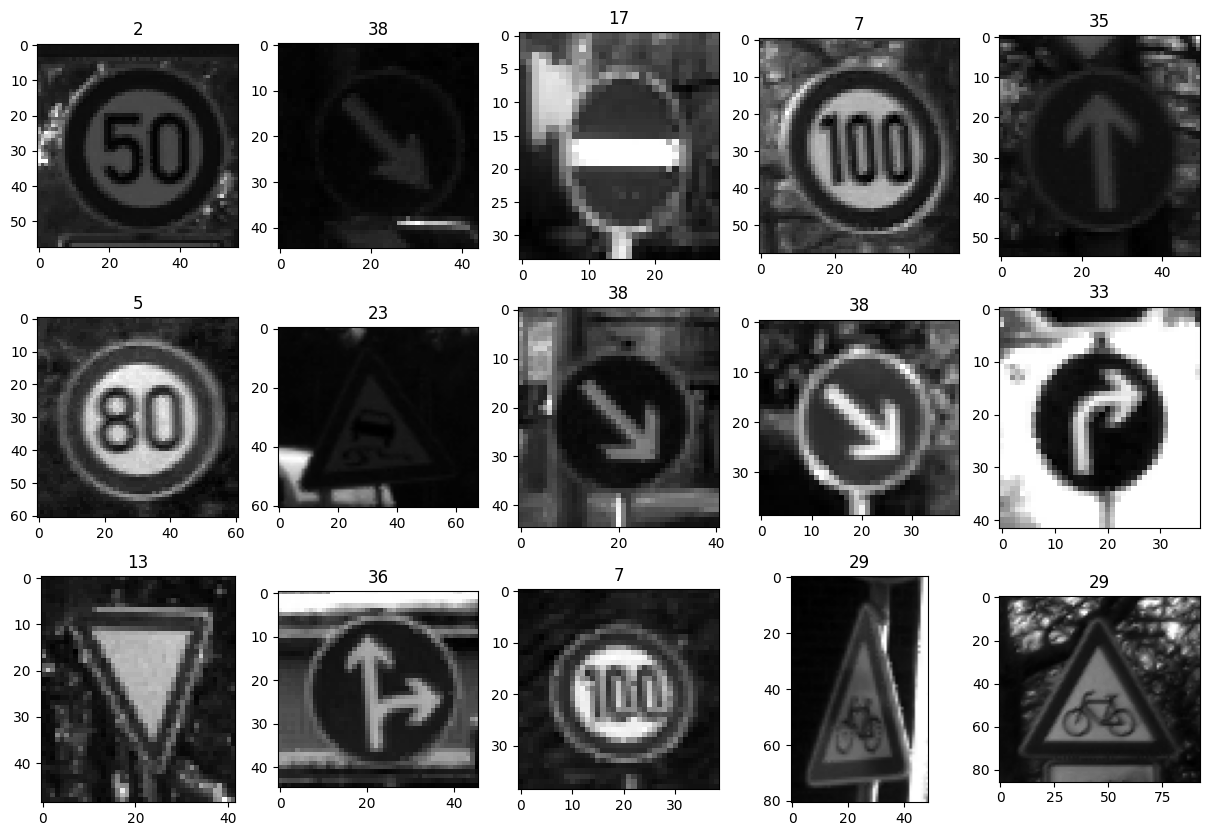

In [133]:
class DataSet:
    def __init__(self, source):
        self._source = source
        self._data = self._getData()

    def plot(self):
        # Number of training samples (amount of samples in data)
        num_samples = self._data.shape[0]

        # Show random data samples
        for ii in range(15):
            # Get random index
            idx = np.random.randint(0, num_samples)
            # Load image
            img = self._getImage(idx)
            # Show image
            plt.subplot(3,5,ii+1), plt.imshow(img, cmap='gray'), plt.title(self._data.iloc[idx]['ClassId'])

    def getBrightnesses(self):
        return np.array([np.mean(self._getImage(index)) for index in range(self._data.shape[0])])

    def _getData(self):
        return pd.read_csv(os.path.join(self._source, 'Train.csv'))
    
    def _getImage(self, idx):
        return cv2.imread(os.path.join(self._source, self._data.iloc[idx]['Path']), cv2.IMREAD_GRAYSCALE)
    
    @property
    def data(self):
        return self._data
    

class DataSetRawZip(DataSet):
    # This class allows to work with the raw zip file without unpacking
    # It works faster in a cases when we should load a lot of images because it loads the whole archive into memory

    def __init__(self, source):
        self._zip = None
        super().__init__(source)

    def __del__(self):
        if self._zip is not None:
            self._zip.close()

    def _getData(self):
        with open(self._source, 'rb') as f:
            raw = io.BytesIO(f.read())

        # Convert the binary data to zipfile format
        self._zip = zipfile.ZipFile(raw, 'r')  # !!! SHOULD BE CLOSED AFTER USING !!!

        return pd.read_csv(self._zip.open('Train.csv'))
    
    def _getImage(self, idx):
        # Read the raw buffer from the archive in memory
        image_buffer = self._zip.open(self._data.iloc[idx]['Path']).read()

        # Convert the buffer as array
        pixels = np.frombuffer(image_buffer, np.uint8)

        # Load image
        return cv2.imdecode(pixels, cv2.IMREAD_GRAYSCALE)


dataset = DataSet('GTSRB')
# dataset = DataSetRawZip('E:/CODE/DataSets/GTSRB.zip')

dataset.plot()

### Step 3

Inspect the dataset by computing and plotting the per-class histogram.

In [134]:
# Extract class identifiers
# Hint: Check the csv 
ids = dataset.data.values[:, 6]

Compute the per class histogram. You can use any approach you want (e.g. `numpy`). It's also worth looking at the `Counter` function from the `collections` module ([link](https://docs.python.org/3/library/collections.html#collections.Counter)) ;-)

(Text(0.5, 0, 'Traffic Sign ID'), Text(0, 0.5, 'Counts'))

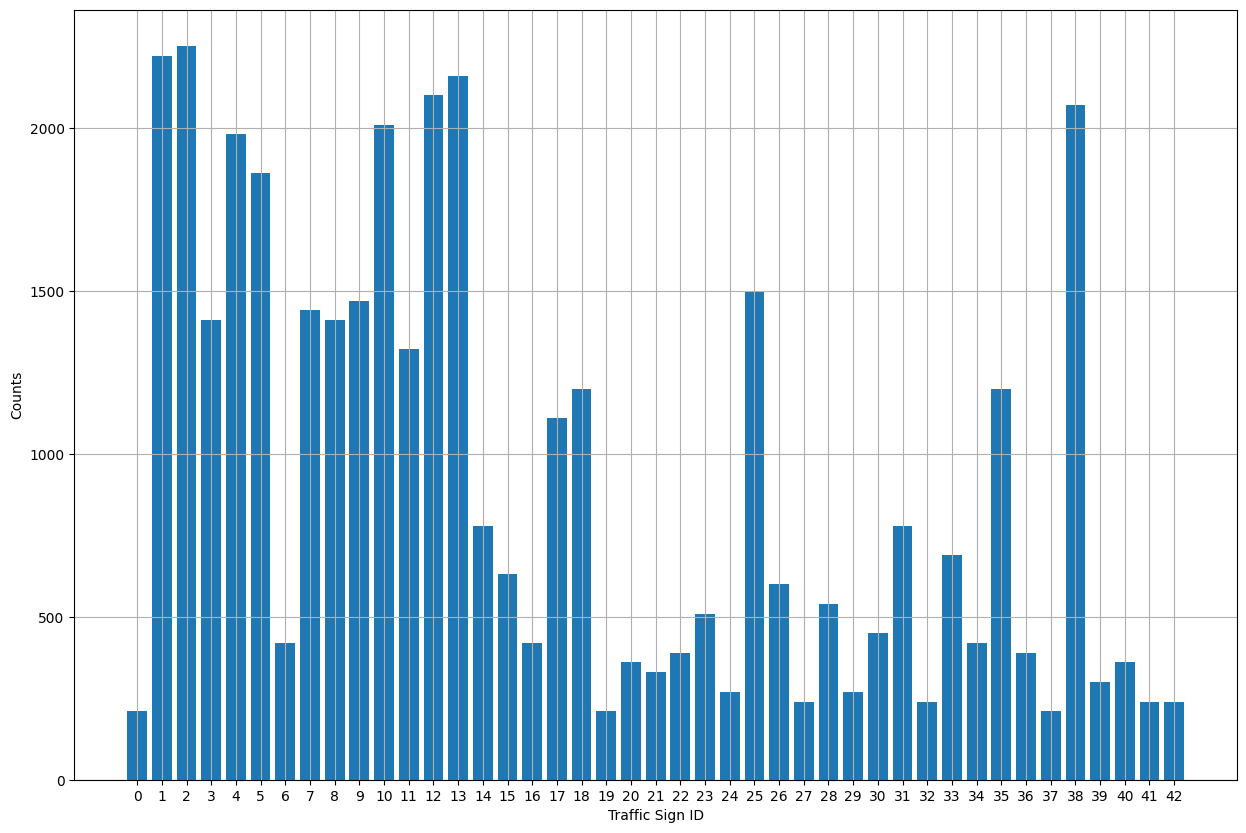

In [135]:
from collections import Counter
hist = Counter(ids)

# hist = np.histogram(ids, bins=np.arange(0, ids.max() + 2) - 0.5)

plt.bar(hist.keys(), hist.values()), plt.xticks(np.arange(0, len(hist), step=1)), plt.grid(True)
plt.xlabel('Traffic Sign ID'), plt.ylabel('Counts')

### Questions

Please answer the following questions:
* Do you consider the dataset to be balanced? If so, why? If not, why?
* Are there any classes that are (significantly) over-represented or under-represeneted?

* The data set is definitely not balanced. Differnces between quantity of images for some classes is around 1000%.
* Of course, for the reason described above.

### Optional

Perform a further analysis on the dataset and draw some conclusion from it.

Hint 1: Unlike MNIST or CIFAR10, this dataset contains images with various spatial resolutions. Is there anything we can tell about the resolution distribution?
Hint 2: What about the brightness distribution? Are there classes there are significantly more bright than others?

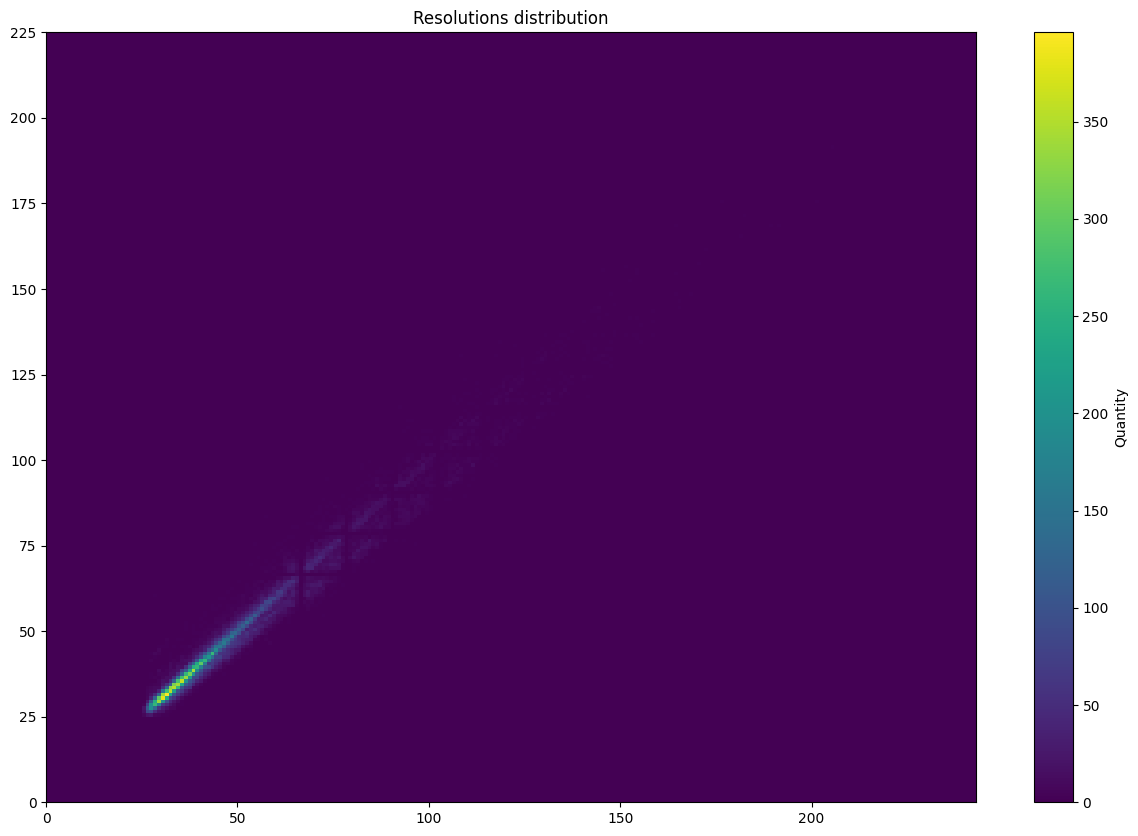

In [136]:
widths = dataset.data.values[:, 0]
heights = dataset.data.values[:, 1]
plt.hist2d(widths, heights, bins=[np.arange(0, max(widths)+1, 1), np.arange(0, max(heights)+1, 1)])
plt.colorbar(label='Quantity')
plt.title('Resolutions distribution')
plt.show()

(Text(0.5, 0, 'Brightnesses'), Text(0, 0.5, 'Counts'))

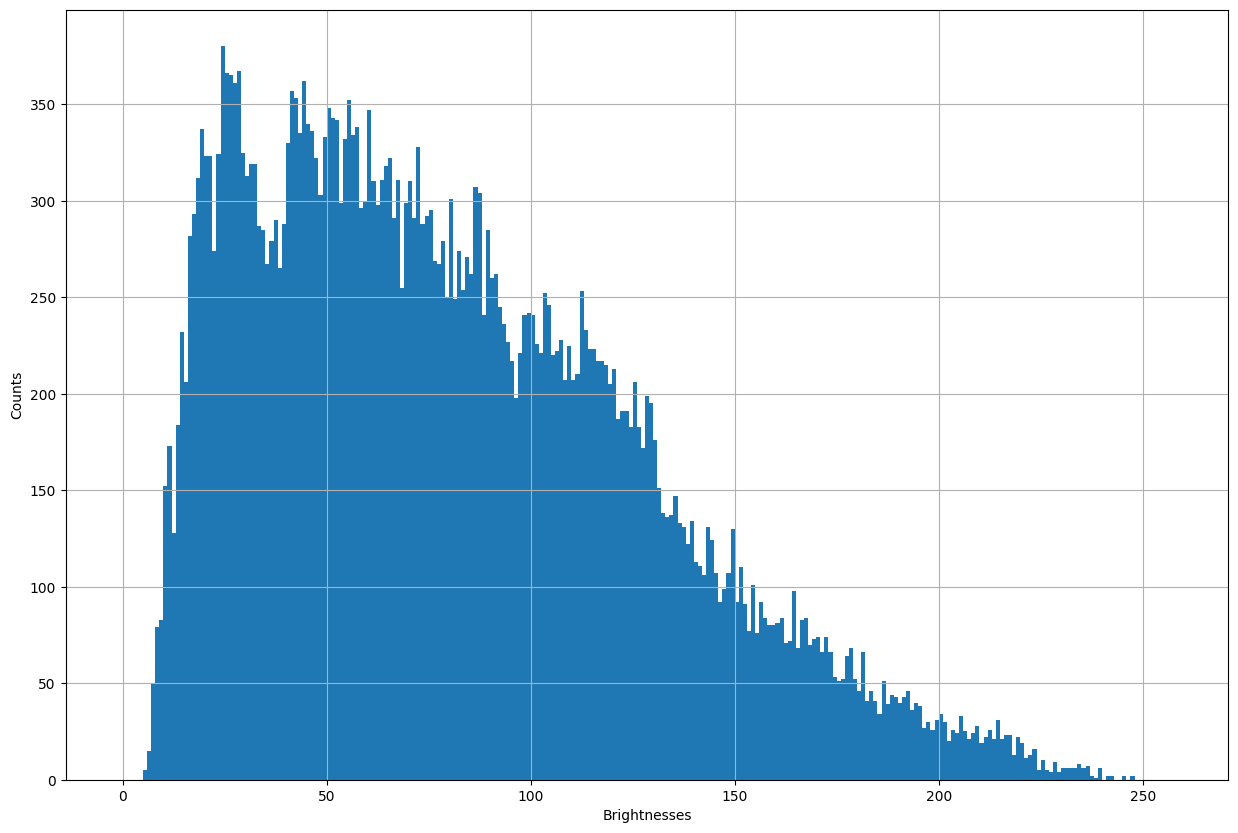

In [137]:
# For this operation it is recommended to use DataSetRawZip for better performance
brightnesses = dataset.getBrightnesses()
hist, bins = np.histogram(brightnesses, bins=np.arange(0, 260) - 0.5)

plt.bar(bins[:-1], hist, width=np.diff(bins)), plt.grid(True)
plt.xlabel('Brightnesses'), plt.ylabel('Counts')
